# Homework: Data visualization and exploration with Pandas

Author: Alexandre Gramfort

### Data:

MovieLens 1M Data Set contain les grades given to movies by users on the Movielens website.

The data are available at:

https://www.dropbox.com/s/qrkmr9avt7rx821/ml-1m.zip?dl=0

and come from:

http://grouplens.org/datasets/movielens/

### Import necessary packages

In [2]:
import pandas as pd
import numpy as np

### Load the "users" data as Pandas DataFrame

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

In [4]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Read the "rating"

In [5]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [6]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


### Read the movies

In [7]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None,
                     encoding='latin_1', names=mnames, engine='python')

In [8]:
pd.read_csv?

In [9]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Let's merge everything as a single DataFrame

In [10]:
data = pd.merge(pd.merge(ratings, users), movies)

In [11]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


# Let's explore the data

### Question 1

How many movies have a grade higher than 4.5 ?
Is there a difference between Male or Females?

In [24]:
print(f'Number of movies with a grade higher than 4.5: {len(data[data.rating > 4.5])}')

Number of movies with a grade higher than 4.5: 226310


<AxesSubplot:ylabel='rating'>

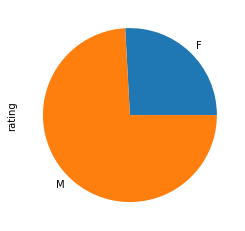

In [39]:
data[data.rating > 4.5].groupby('gender').agg({'rating': 'count'})['rating'].plot.pie()

### Question 2

How many movies have a median grade higher than 4,5 among the men older than 30 years? And among the women older than 30?

### Question 3a

What are the most popular movies?

Hint: use the `DataFrame.nlargest` method.

In [53]:
best = data.groupby('title').agg({'rating': 'mean'}).reset_index().sort_values(by='rating', ascending=False)[:5]

### Question 3b

What are the most popular movies among the movies that have at least 30 grades? 

### Question 3c

What is the movie with the highest number of ratings?

# Data Visualization

In [54]:
%matplotlib inline 

### Question 4

Show the histogram of the ratings.

### Question 5

Show the histogram of the number of grades obtained for each movie.

### Question 6

Show the histogram of the mean grade for each movie.

Does the distribution of the grade depend on the gender of the user?

### Question 7

Show the histogram of grades among the movies that have been graded at least 30 times.

### Question 8

Show as "scatter plot" the mean grades for the men vs the grades of the women.

Now restrict the plot to the movies with at least 100 grades.

### Question Bonus

Make nice data visualization to highligh a specific effect in the data.